<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyse-dans-le-domaine-fréquentiel" data-toc-modified-id="Analyse-dans-le-domaine-fréquentiel-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyse dans le domaine fréquentiel</a></span><ul class="toc-item"><li><span><a href="#Notion-de-densité-spectrale-de-Puissance" data-toc-modified-id="Notion-de-densité-spectrale-de-Puissance-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notion de densité spectrale de Puissance</a></span></li><li><span><a href="#Power-spectrum-estimation" data-toc-modified-id="Power-spectrum-estimation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Power spectrum estimation</a></span></li></ul></li><li><span><a href="#Applications" data-toc-modified-id="Applications-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Applications</a></span><ul class="toc-item"><li><span><a href="#Matched-filter" data-toc-modified-id="Matched-filter-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Matched filter</a></span><ul class="toc-item"><li><span><a href="#Matched-filter---Experiment" data-toc-modified-id="Matched-filter---Experiment-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Matched filter - Experiment</a></span></li></ul></li><li><span><a href="#Wiener-filtering" data-toc-modified-id="Wiener-filtering-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Wiener filtering</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Illustrative-experiment" data-toc-modified-id="Illustrative-experiment-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Illustrative experiment</a></span></li><li><span><a href="#Derivation-of-the-Wiener-filter" data-toc-modified-id="Derivation-of-the-Wiener-filter-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Derivation of the Wiener filter</a></span></li><li><span><a href="#Experiment" data-toc-modified-id="Experiment-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Experiment</a></span></li><li><span><a href="#Wiener-Smoother-in-the-time-domain" data-toc-modified-id="Wiener-Smoother-in-the-time-domain-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Wiener Smoother in the time domain</a></span></li></ul></li></ul></li></ul></div>

In [3]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets


## Analyse dans le domaine fréquentiel

En repartant de la formule des interférences 
$$
R_{Y_1Y_2}(m) = \left( h_1 * R_{X_1X_2} * h_2^{*(-)}\right) (m),
$$
on obtient simplement, après transformée de Fourier,
$$
\fbox{$S_{Y_1Y_2}(f) =  H_1(f) S_{X_1X_2}(f) H_2^{*}(f)$},
$$
où $S_{Y_1Y_2}(f), S_{X_1X_2}(f), H_1(f)$ et $H_2(f)$ sont 
respectivement les transform\'ees de Fourier de $R_{Y_1Y_2}(m)$,
$R_{X_1X_2}(m)$, $h_1(m)$ et  $h_2(m)$.
Note{La  transformée de Fourier de $h^*(-n)$ vaut $H^*(f)$.}\\

\noindent\textbf{Conséquences :}

\begin{enumerate}
\item En prenant $Y_1=Y_2=Y$, $X_1=X_2=X$ et $H_1=H_2=H$, c'est-à-dire 
que l'on considère un seul filtre, il vient
$$
\fbox{$S_{YY}(f) =  S_{XX}(f) |H(f)|^2 $}.
$$
\item Si $H_1(f)$ et $H_2(f)$ sont deux filtres \textit{disjoints} en fréquence, alors
$$
S_{Y_1Y_2}(f) =  0.
$$
On en déduit que 
$$
R_{Y_1Y_2}(\tau) = \mathrm{TF}^{-1}[S_{Y_1Y_2}(f)] = \mathrm{TF}^{-1}[0] =0.
$$
si les filtres sont disjoints en fréquence, l'intercorrélation des sorties est nulle.
\end{enumerate}


\noindent\textit{Application}
Considérons deux filtres parfaits autour de deux fréquences pures $f_1$ et $f_2$, de même entrée
$X(n,\omega)$. On a ${Y_1(n,\omega)}= {X(f_1,\omega)}\expo{-j2\pi f_1n}$, et ${Y_2(n,\omega)}= 
{X(f_2,\omega)}\expo{-j2\pi f_2n}$, avec toutes les précautions d'usage sur la << non existence >> 
de la transformée de Fourier considérée pour des signaux aléatoires stationnaires. Dans ces conditions,
$$
R_{Y_1Y_2}(0) = \E{X(f_1,\omega)X^*(f_2,\omega)}\expo{-j2\pi (f_1-f_2)n}=0,
$$
soit
$$
\E{X(f_1,\omega)X^*(f_2,\omega)}=0.
$$
On dit que les composantes spectrales sont décorrélées.

### Notion de densité spectrale de Puissance

La densité spectrale de puissance représente la répartition de la puissance du signal dans le domaine 
fréquentiel. Il s'agit exactement de la même notion que celle de densité de probabilité : lorsque l'on veut calculer 
probabilité qu'une variable aléatoire $X$ appartienne à un certain intervalle $[x_1,x_2]$, il suffit d'intégrer la 
densité de probabilité de la variable entre ces deux bornes :
$$
\mathrm{Pr}(X \in[x_1,x_2]) = \int_{x_1}^{x_2} p(X) \dr{X}.
$$
Si on appelle $D_{XX}(f)$ la densité spectrale de puissance d'un signal aléatoire
$X(n,\omega)$, alors la puissance du signal portée par les composantes 
fréquentielles comprises entre $f_1$ et $f_2$ s'écrit
$$
P_{XX}(f \in [f_1,f_2]) = \int_{f_1}^{f_2} D_{XX}(f) \dr{f}.
$$ 
Dès lors, la puissance totale du signal s'écrit
\[
P_{XX} = \int_{-\frac{1}{2}}^{+\frac{1}{2}} D_{XX}(f) \dr{f}.
\]
Or on sait que, pour un signal stationnaire et ergodique,
\[
P_{XX} = \E{|X(n,\omega)|^2} = R_{XX}(0) = \lim_{N \rightarrow 
+\infty} \frac{1}{2N} \sum_{-N}^{+N} |X(n,\omega)|^2. 
\]
Par ailleurs,
\[
R_{XX}(\tau) = \int_{-\frac{1}{2}}^{+\frac{1}{2}} S_{XX}(f) \expo{j2\pi f\tau} \dr{f},
\]
soit, pour $\tau=0$,
\[
R_{XX}(0) = P_{XX} = \int_{-\frac{1}{2}}^{+\frac{1}{2}} S_{XX}(f) ~\dr{f}.
\]
La transformée de Fourier $S_{XX}(f)$ de la fonction d'autocorrélation est ainsi 
une bonne candidate pour être la densité spectrale de puissance. Notons cependant, 
cette dernière relation ne prouve pas qu'elle le soit.

Considérons un filtre parfait, dont le module de la fonction de transfert est
d'amplitude un dans une bande $\Delta f$ centrée sur une fréquence $f_0$, et 
nul ailleurs : 
\[
\left\{
\begin{array}{l}
|H(f)| = 1 \mbox{  pour  } f \in [f_0 - \frac{\Delta f}{2},f_0 + \frac{\Delta 
f}{2}] \\
|H(f)| = 0 \mbox{   ailleurs.}
\end{array}
\right.
\]
Notons $Y(n,\omega) = (h*X)(n,\omega)$ la réponse de ce filtre à une entrée 
$X(n,\omega)$. La puissance de la sortie est donnée par
\[
P_{YY} = R_{YY}(0) = \int_{-\frac{1}{2}}^{+\frac{1}{2}} S_{YY}(f) ~\dr{f},
\]

or la formule des interférences fournit
\[
S_{YY}(f) = S_{XX}(f) |H(f)|^2,
\]
avec les conditions sur le module de $H(f)$ données précédemment. On obtient donc
\[
P_{YY}(f \in [f_0 - \frac{\Delta f}{2},f_0 + \frac{\Delta f}{2}])  = \int_{f_0 - 
\frac{\Delta f}{2}}^{f_0 +\frac{\Delta f}{2}} S_{XX}(f) ~\dr{f}, 
\]
ce qui correspond bien à la définition de la densité spectrale de puissance : la 
puissance pour les composantes spectrales comprises dans un intervalle est bien 
égale à l'intégrale de la densité spectrale de puissance sur cet intervalle.
Si $\Delta f$ est suffisamment faible, on pourra considérer la densité spectrale 
de puissance $S_{XX}(f)$ comme approximativement constante sur l'intervalle, et
\[
P_{YY}(f \in [f_0 - \frac{\Delta f}{2},f_0 + \frac{\Delta f}{2}]) \simeq 
S_{XX}(f_0) \Delta {f}.
\]
Cette dernière relation indique que la densité spectrale de puissance doit 
s'exprimer en Watts par Hertz. Par ailleurs, lorsque $\Delta f$ tend vers 0, la 
puissance recueillie est de plus en plus faible. Pour $\Delta f = 0$, la puissance 
obtenue est ainsi normalement nulle, sauf si la densité spectrale elle-même est 
constituée par une << masse >> de Dirac (de largeur nulle mais d'amplitude 
infinie) à la fréquence considérée.

Notons que le filtre que nous avons défini ci-dessus n'est défini, par commodité 
de présentation, que pour les fréquences positives. Sa fonction de transfert ne 
vérifie donc pas la propriété de symétrie hermitienne des signaux réels : la 
réponse impulsionnelle associée est donc complexe et la sortie $Y(t,\omega)$ 
également complexe. En restaurant cette symétrie, c'est-à-dire en imposant 
$H(f)=H^*(-f)$, ce qui entraîne (notez le module de $f$)
\[
\left\{
\begin{array}{l}
|H(f)| = 1 \mbox{  pour  } |f| \in [f_0 - \frac{\Delta f}{2},f_0 + \frac{\Delta 
f}{2}] \\
|H(f)| = 0 \mbox{   ailleurs,}
\end{array}
\right.
\]
la puissance en sortie est
\[
P_{YY} = \int_{-f_0 - \frac{\Delta f}{2}}^{-f_0 +\frac{\Delta f}{2}} S_{XX}(f)
~\dr{f} + \int_{f_0 - \frac{\Delta f}{2}}^{f_0 +\frac{\Delta f}{2}} S_{XX}(f)
~\dr{f}.
\]
La densité spectrale de puissance d'un signal aléatoire réel est une fonction 
paire, ce qui conduit enfin à
\[
P_{YY} = 2 \int_{f_0 - \frac{\Delta f}{2}}^{f_0 +\frac{\Delta f}{2}} S_{XX}(f)
~\dr{f},
\]
relation qui indique que la puissance se partage équitablement dans les fréquences
positives et négatives.\\

\noindent\textbf{Exemple} :\\

Considérons le cas d'une sinusoïde à amplitude et phase aléatoire
\[
X(n,\omega) = A(\omega) \sin (2\pi f_0 n + \phi(\omega)),
\]
où $A(\omega)$ est une variable aléatoire centrée de variance $\sigma^2$ et 
$\phi(\omega)$ uniformément répartie sur $[0,2\pi]$.
La fonction d'autocorrélation de ce signal vaut
\[
R_{XX}(\tau) = \frac{\sigma^2}{2}\cos(2 \pi f_0 \tau).
\]
Par transformée de Fourier, on obtient la densité spectrale :
\[
S_{XX}(f) = \frac{\sigma^2}{4}[\delta(f+f_0) + \delta(f-f_0)].
\]
Enfin, en intégrant la densité spectrale
\[
\int \frac{\sigma^2}{4}[\delta(f+f_0) + \delta(f-f_0)] \dr{f}= \frac{\sigma^2}{2},
\]
on retrouve  la puissance de la sinusoïde, $\sigma^2/2$, comme il se doit.\\

Les fonctions de corrélation et les densités spectrales de puissance forment des 
paires de transformées de Fourier :
\[
\boxed{
\begin{array}{lcl}
S_{XX}(f) & \flecheTF & R_{XX}(\tau), \\
S_{XY}(f) & \flecheTF & R_{XY}(\tau),
\end{array}
}
\]
où $S_{XX}(f)$, $S_{XY}(f)$ sont les densités spectrale de puissance et de puissance 
d'interaction, respectivement. Ces relations constituent le **théorème de 
Wiener-Kintchine-Einstein**.

### Power spectrum estimation

In [2]:
from scipy.signal import lfilter
from numpy.fft import fft, ifft, fftshift, fftfreq

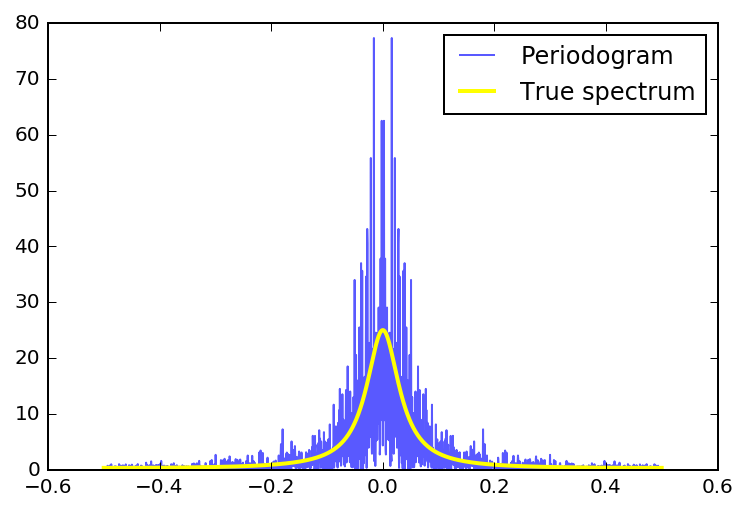

In [3]:
N=2000
a=-0.8
x=stats.norm(0,1).rvs((N))
y=lfilter([1],[1, a],x)
Yf=fft(y)
Py=1/N*abs(Yf)**2
f=fftfreq(N)
f=np.linspace(-0.5,0.5,N)
Sy=abs(1/abs(fft([1, a],N))**2)
plt.plot(f,fftshift(Py),alpha=0.65,label="Periodogram")
plt.plot(f,fftshift(Sy),color="yellow", lw=2,label="True spectrum")
plt.legend()
#
# Smoothing
#
Ry=ifft(Py)
hh=sig.hamming(200,sym=True)

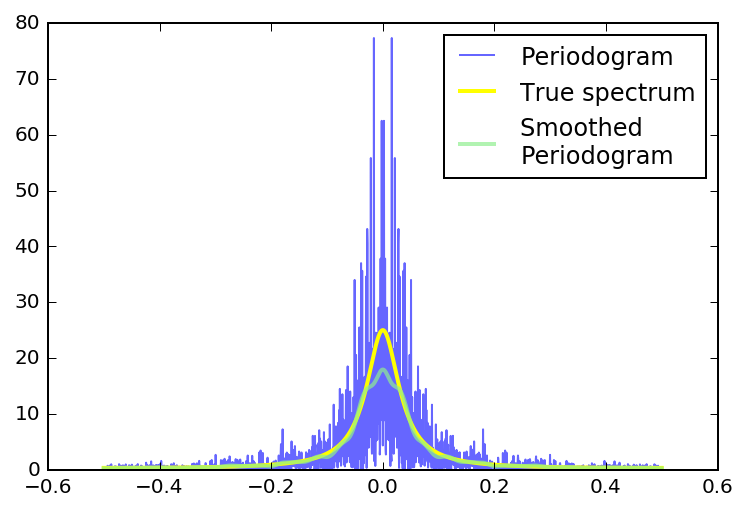

In [4]:
z=np.zeros(N)
L=100
h=fftshift(sig.hanning(L,sym=True))
z[0:round(L/2)]=h[0:round(L/2)]
z[-1:-round(L/2)-1:-1]=h[-1:-round(L/2)-1:-1]
Py_smoothed=abs(fft(z*Ry))
plt.plot(f,fftshift(Py),alpha=0.6,label="Periodogram")
plt.plot(f,fftshift(Sy),lw=2,color="yellow",label="True spectrum")
plt.plot(f,fftshift(Py_smoothed),alpha=0.7,color="lightgreen", lw=2,label="Smoothed \nPeriodogram")
_=plt.legend()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


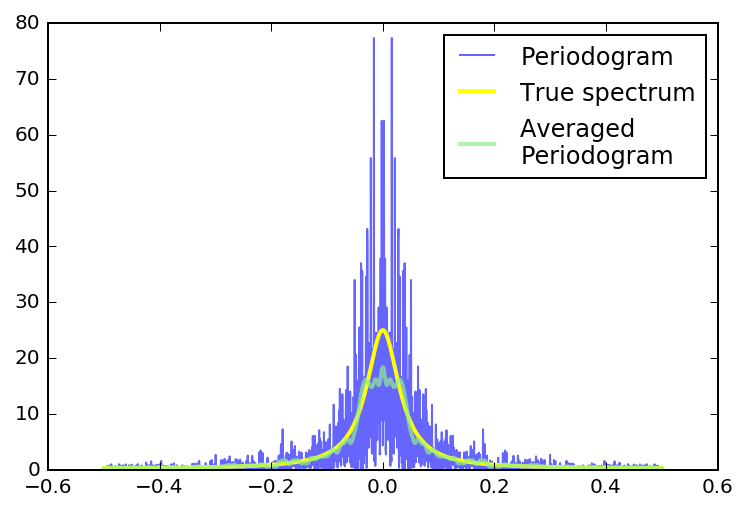

In [5]:
#Averaging
def averaged_perio(y,M):
    N=np.size(y)
    L=np.round(N/M)
    Py_averaged=np.zeros(N)
    for m in range(M):
        Py_averaged+=1/L*(abs(fft(y[m*L:(m+1)*L],N))**2)
    return  Py_averaged/M

Py_averaged=averaged_perio(y,20)

plt.plot(f,fftshift(Py),alpha=0.6,label="Periodogram")
plt.plot(f,fftshift(Sy),lw=2,color="yellow",label="True spectrum")
plt.plot(f,fftshift(Py_averaged),alpha=0.7,color="lightgreen",lw=2,label="Averaged \nPeriodogram")
plt.legend()

## Applications

### Matched filter

We consider a problem frequently encountered in practice, in applications as echography, seismic reflexion, sonar or radar. The problem at hand is as follows: we look for a *known waveform* $s(n)$, up to a delay $n_0$ in a mixture
$$
y(n)= A s(n-n_0) + v(n),
$$
where $A$ and $n_0$ are unknowns and $v(n)$ is an additive noise. 
The problem is to find the delay $n_0$, which typically corresponds to a time-to-target. 
In order to do that, supppose that we filter the mixture by a filter with impulse response $h$. The ouput has the form
$$
z(n) = x(n) + w(n),
$$
with $x(n)=A[h*s](n-n_0)$ and $w(n)=[h*v](n)$, respectively the outputs of the signal and noise part. Clearly, if $v(n)$ is stationnary, so is $w(n)$. Therefore, the idea is to design $h$ so that the signal output is as greater as possible than the noise output, at time $n_0$. In statistical terms, we put this as choosing the filter such that ratio of  the signal output'*power*  to the noise output's power is maximum. Hence, our goal is to design a filter which maximizes the signal-to-noise ratio at time $n_0$. We suppose that the desired signal is deterministic and thus consider its instantaneous power $|x(n_0)|^2$.

The signal-to-noise ratio at time $n_0$ is
$$
SNR(n_0) = \frac{|x(n_0)|^2}{\E{|w(n)|^2}}.
$$
Of course, both the numerator and the denominator depends on the filter. Lets us first consider the numerator. We have
\begin{align}
x(n_0) & = \mathrm{FT}^{-1}[X(f)]_{n=n_0} \\
& = \left.\int H(f) \mathrm{FT}[s(n-n_0)]  e^{j2\pi f n}\dr{f}\right|_{n=n_0} \\
& = \left.\int H(f) S(f)e^{-j2\pi f n_0} e^{j2\pi f n}\dr{f}\right|_{n=n_0} \\
& = \int H(f) S(f)\dr{f}.
\end{align}
As far as the denominator is concerned, we have by the Wiener-Kintchine theorem, that
$$
\E{|w(n)|^2} = \int S_{WW}(f) \dr{f} =  \int |H(f)|^2 S_{VV}(f) \dr{f}.
$$
Finally, the signal-to-noise ratio becomes
$$
\boxed{
SNR(n_0) = \displaystyle{\frac{\left|\int H(f) S(f)\dr{f}\right|^2}{\int |H(f)|^2 S_{VV}(f) \dr{f}}}.
}
$$
In order to maximize the signal-to-noise ratio we invoke the [Cauchy-Schwarz](http://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality) inequality. Recall that that this inequality states that given to integrable functions $f$ and $g$ and a positive measure $w$, then 
$$
\left|\int f(x)g(x)^* w(x) \dr{x}\right|^2 \leq \int |f(x)|^2 w(x) \dr{x} \int |g(x)|^2 w(x) \dr{x} 
$$
with equality if and only if $f(x)=kg(x)$ for any arbitrary real constant $k$. 

The idea is to apply this inequality in order to simplify the $SNR(n_0)$. For that, let us express the numerator as 
$$
\int H(f) S(f)\dr{f} = \int H(f)\sqrt{S_{VV}(f)} \frac{S(f)}{\sqrt{S_{VV}(f)}}\dr{f}.
$$
By the Cauchy-Schwarz inequality, we then get that
$$
\left|\int H(f) S(f)\dr{f} \right|^2 \leq \int |H(f)|^2 S_{VV}(f) \dr{f} \int \left|\frac{S(f)}{\sqrt{S_{VV}(f)}} \right|^2\dr{f}
$$
Injecting this inequality in the  $SNR(n_0)$ we obtain that
$$
\boxed{
 \displaystyle{SNR(n_0)\leq \int \left|\frac{S(f)}{\sqrt{S_{VV}(f)}} \right|^2\dr{f}}
 }.
$$
This shows that the SNR at $n_0$ **is upper bounded** by a quantity which is independent of $H(f)$. Furthermore, by the conditions for equality in the Cauchy-Schwartz inequality, we have that the bound is attained if and only if 
$$
H(f) = k \frac{S(f)^*}{{S_{VV}(f)}}.
$$
In the special case where $v(n)$ is a white, then $S_{VV}(f)$ is a constant, say $S_{VV}(f)=\sigma^2$, and 
$$
H(f) = k' {S(f)^*}.
$$
By inverse Fourier transform, the corresponding impulse response is nothing but 
$$
h(n) = k' s(-n)^*,
$$
that is, the **complex conjugate and reversed** original waveform. This will be important to link the output of the filter to an estimate of the cross-correlation function. For now, let us also observe that the general transfer function $H(f)$ can be interpreted as a a **whitening operation** followed by the matched filter for an additive white noise:
$$
H(f) = k \frac{S(f)^*}{{S_{VV}(f)}}= k \underbrace{\frac{1}{\sqrt{S_{VV}(f)}}}_\text{whitening} \times \underbrace{\frac{S(f)^*}{\sqrt{S_{VV}(f)}}}_\text{matched filter}
$$

Finally, the output of the matched filter can be viewed as the computation of an estimated of the cross-correlation function. Indeed, the output of the $h(n)$ with input $x$ is
\begin{align}
y(n) & = \sum_l h(l) x(n-l) \\
& = \sum_l s(-l)^* x(n-l) \\
& = \sum_m s(m)^* x(n+m) \\
& = \hat{R}_{xs}(n),
\end{align}
where $\hat{R}_{xs}(n)$ is, up to a factor, an estimate of the cross-correlation between $x$ and $s$. Applying this remark to our initial mixture
$$
y(n)= A s(n-n_0) + v(n)
$$
we get that
$$
z(n) = A \hat{R}_{ss}(n-n_0) + \hat{R}_{vs}(n).
$$
Finally, since $v$ and $s$ are uncorrelated, $\hat{R}_{vs}(n)\simeq 0$ and since $\hat{R}_{ss}(n)$ is maximum at zero, we see that the output will present a peak at $n=n_0$, thus enabling to locate the value of the delay $n_0$. 

#### Matched filter - Experiment

 
 >We simulate now a problem in seismic reflection (or in sonar, or radar), where the goal is to detect the positions of interfaces reflecting the incident waves. The time it takes for a reflection from a particular boundary to arrive at the recorder (a geophone) is called the travel time.  For a simple vertically traveling wave, the travel time $\tau$ from the surface to the reflector and back is called the Two-Way Time (TWT) and is given by the formula $\tau=2d/c$, with $d$ the distance from the origin to the refector. 
 To a whole set of interfaces then corresponds the observation
 $$
  r(t)= \sum A_i s(t-t_i) + b(t)
 $$
 where the $t_i$ are the delays associated with each interface and $A_i$ the reflection coefficients.
 
 >In order to localize the interfaces, we use a matched filter, which maximizes the signal to noise ratio. 
 
 >1. Implement the matched filter. Examine the different signals. Is it possible to detect the positions of the interfaces on the time series? using the correlation functions? What is the interest to choose a stimulation signal with a very peaky autocorrelation? 
 
 >2. Consider a noisy version of the observation (add a Gaussian noise with standard deviation $A$). Compute the output of the matched filter, with impulse response $h(n)=s(-n)$ and introduce a threshold at $3.3$ times the noise standard deviation. Interpret this threshold. Conclusions. Experiment with the level of noise, the number of samples, etc
 

In [1]:
def zeropad(v, N):
     a=zeros(N)
     a[arange(len(v))]=v
     return a

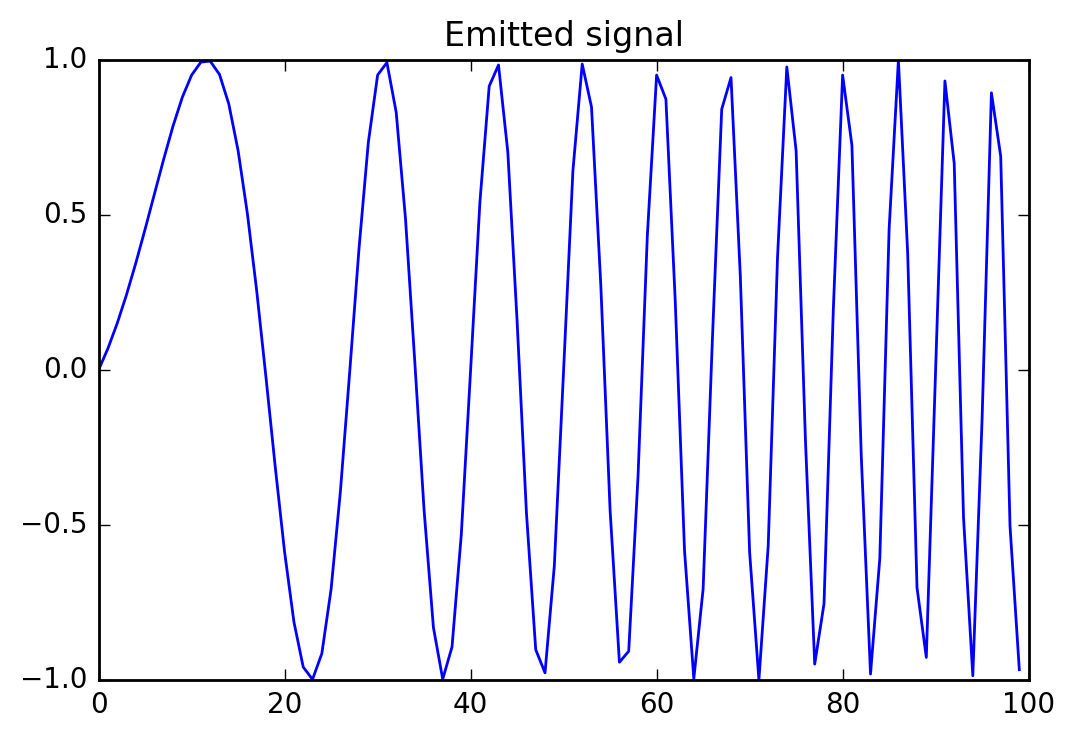

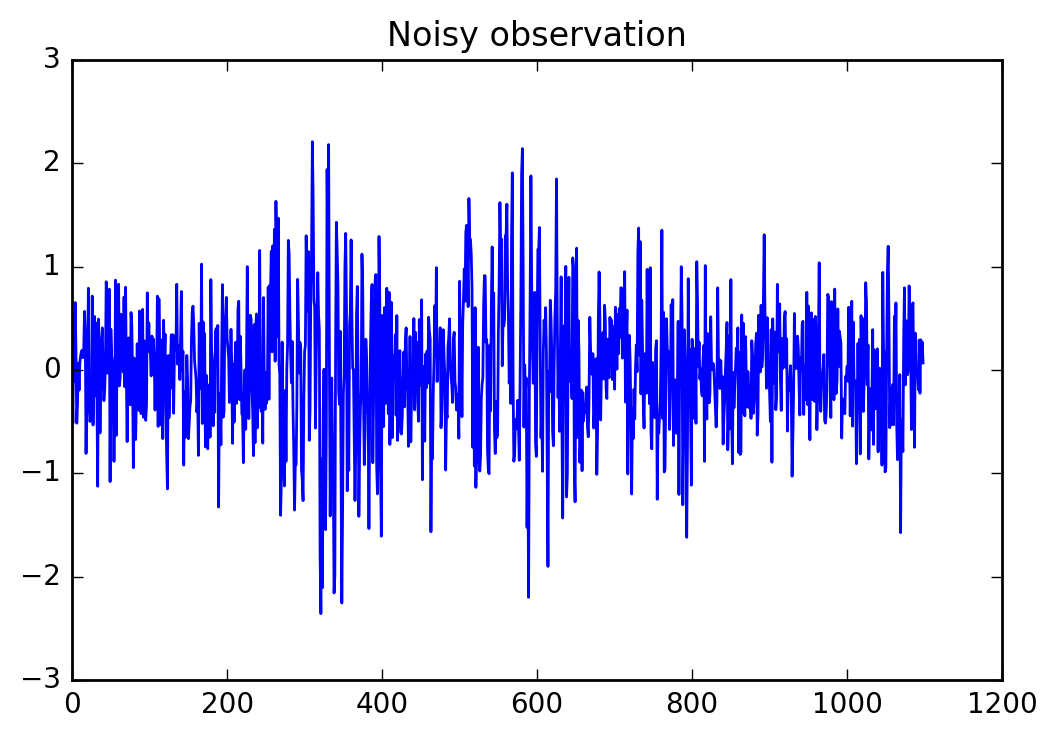

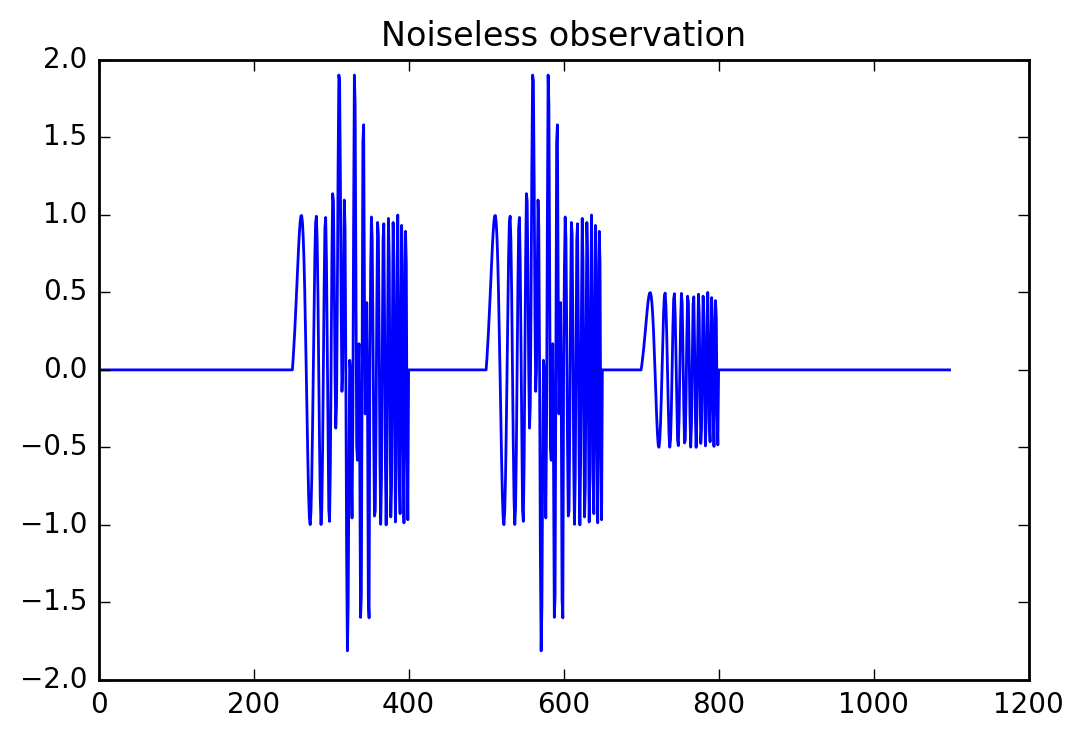

In [4]:
N=1000
#Interface detection by cross-correlation
t=np.arange(100); A=0.5;
s=1*sin(2*pi*0.01*(1+0.1*t)*t) #emitted signal
figure() 
plot(t,s) 
title('Emitted signal');
# List of interfaces
pos=array([250,300,500,550,700])
amp=array([1,1,1,1,0.5])
g=zeros(N); g[pos]=amp
y=np.convolve(s,g)
z=y+A*randn(size(y))
figure(2); plot(z); title('Noisy observation')
figure(3) 
plot(y); title('Noiseless observation')

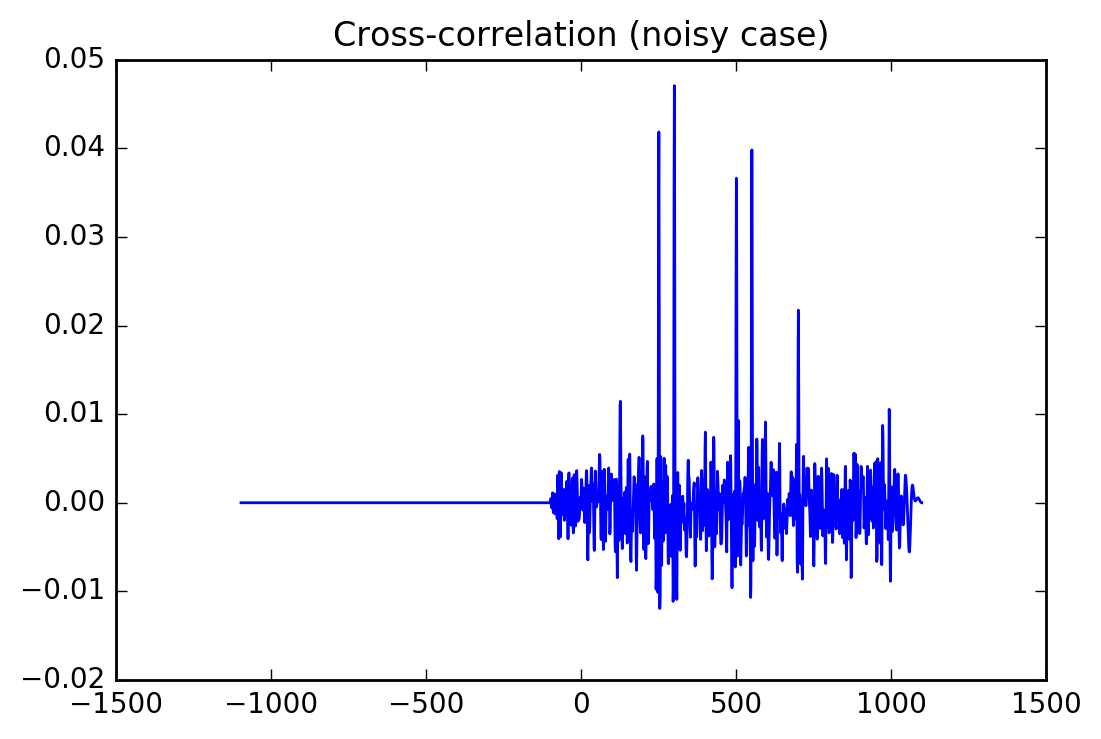

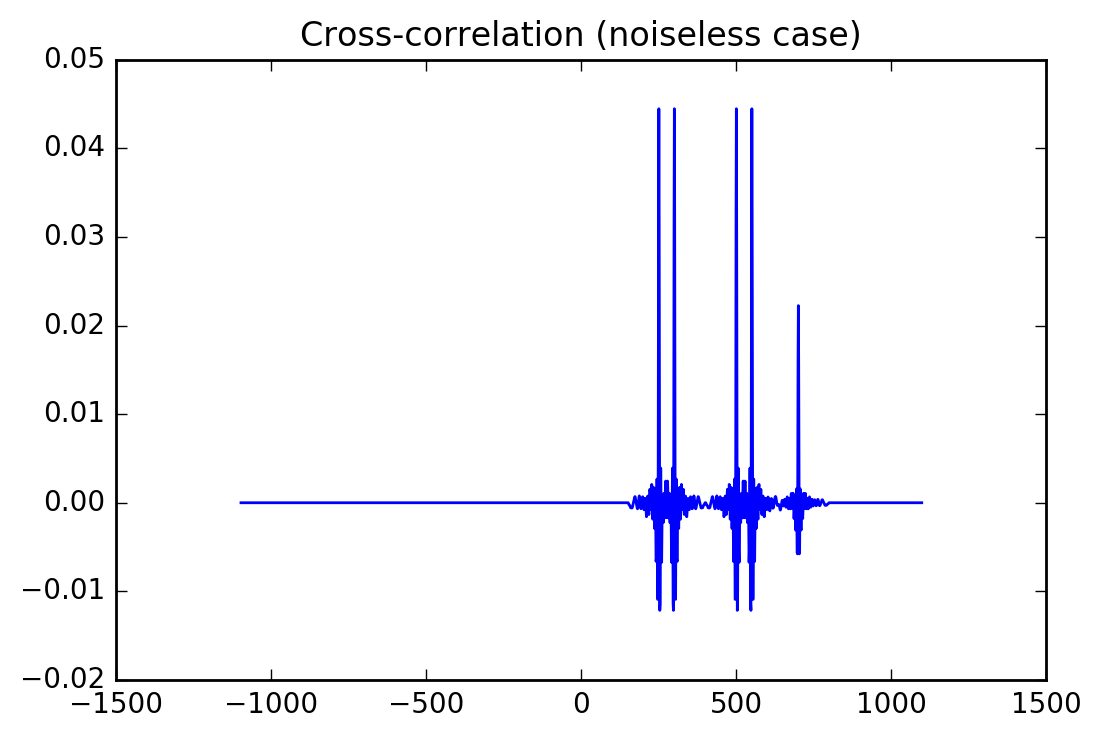

In [5]:
from correlation import xcorr
sp=zeropad(s,len(z))
figure(4); Rzs,lags=xcorr(z,sp); 
plot(lags,Rzs); 
title('Cross-correlation (noisy case)')
figure(5); Rys,lags=xcorr(y,sp);  plot(lags,Rys); 
title('Cross-correlation (noiseless case)')

 Finally, we introduce a threshold in order to eliminate the peaks due to the noise. For that, we compute the threshold so as to have less than some fixed probability to exceed this level. 

 The method `interval` of an object `stats.norm` returns the endpoints of the range that contains alpha percents of the distribution.

In [7]:
interv=stats.norm.interval(alpha=0.999,loc=0,scale=1)
print(interv)

(-3.2905267314918945, 3.2905267314919255)


 And the actual thresholding:

The position of interfaces are at [249 250 251 299 300 301 499 500 501 549 550 551 699 700 701]


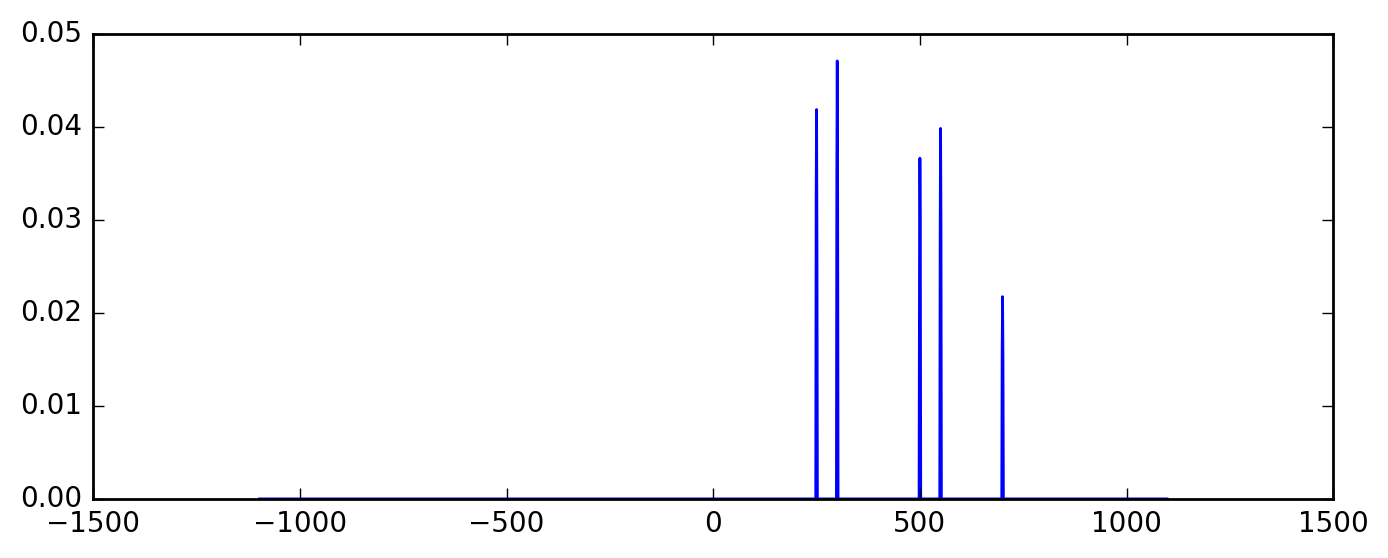

In [8]:
LR=len(Rzs)
Rzs_th=zeros(LR)
intervs=array(interv)*std(Rzs[500:])

Rzs_th=array([Rzs[u] if (Rzs[u]<intervs[0] or Rzs[u]>intervs[1]) else 0 for u in range(LR)])
fig,ax=subplots(1,1,figsize=(8,3))
ax.plot(lags,Rzs_th)
print("The position of interfaces are at",where(Rzs_th!=0)[0]+lags[0])

 Quick and Dirty thing to find the "center" of consecutive value ranges 
 

In [11]:
def find_center(v):
    Beg=v[0]; Endy=v[0]
    u=0; C=[]
    for k in range(1,len(v)):
        if (v[k]-v[k-1]) in (1,2):
            Endy=Endy+1
        else:
            C.append((Endy+Beg)/2)
            u=u+1
            Beg=v[k]; Endy=v[k]
    if Endy==v[len(v)-1]:
        C.append((Endy+Beg)/2) 
    return C

In [12]:
posit=find_center(where(Rzs_th!=0)[0]+lags[0])
print("Positions where the signal exceeds threshold:\n".ljust(35),
      where(Rzs_th!=0)[0]+lags[0])
print("Detected interfaces positions: ".ljust(35),posit)
print("True positions; ".ljust(35), pos)

Positions where the signal exceeds threshold:
 [246 249 250 251 299 300 301 499 500 501 549 550 551 699 700 701]
Detected interfaces positions:      [246.0, 250.0, 300.0, 500.0, 550.0, 700.0]
True positions;                     [250 300 500 550 700]


### Wiener filtering

#### Introduction

We consider now the problem of recovering a signal $s(n)$ from an indirect and noisy measurement
$$
x(n)= [h*s](n) + v(n).
$$
This problem involves actually two sub-problems that are very interesting on their own:
- *smoothing* of the additive noise, 
- inversion.


Let us first examine a simple experiment which points-out the necessity of developing a rational approach instead of a adopting a naive one. We generate a random pulse train, filter it, and then reconstruct the input signal by direct division by the transfer function:
$$
S(f) \simeq \frac{X(f)}{H(f)} = S(f)+\frac{V(f)}{H(f)}
$$
We consider both a noiseless case and a noisy case.

#### Illustrative experiment

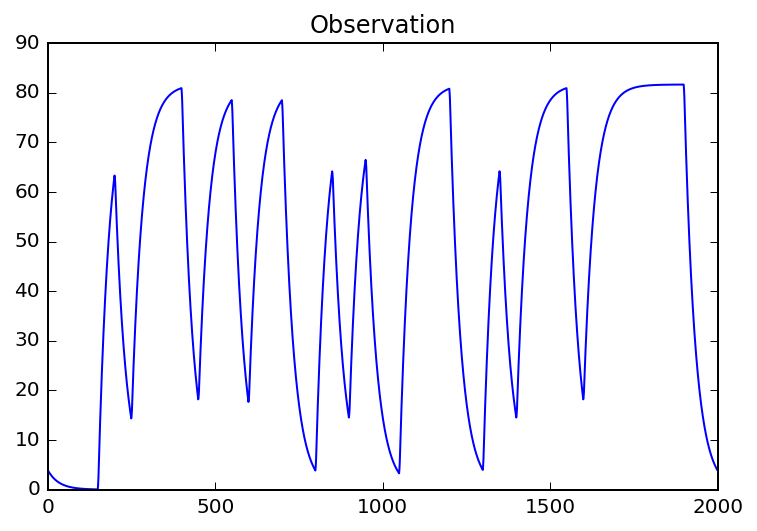

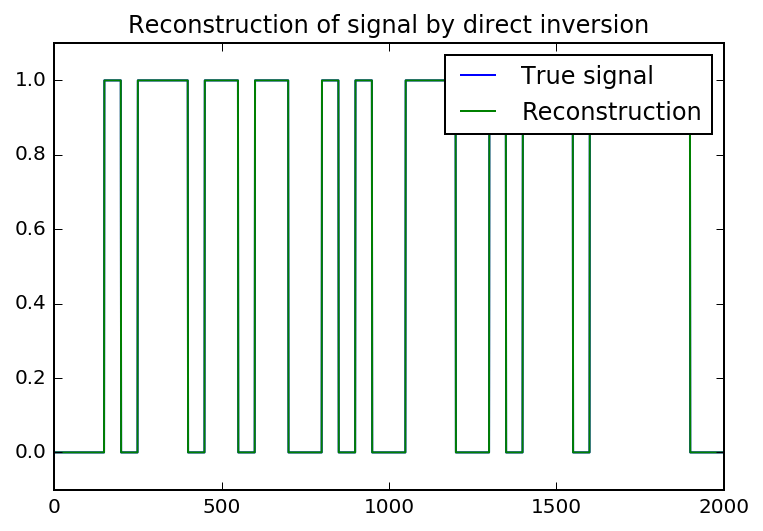

In [13]:
N=2000
a=-0.97
L=50
spos=stats.bernoulli.rvs(loc=0,p=0.6,size=N/L)
s=np.kron(spos,np.ones(L))
#x=stats.norm(0,1).rvs((N))
d=np.zeros(N); d[0]=1 #Dirac impulse
h=sig.lfilter([1, 0.5, 0.95],[1, a],d)
#h=sig.lfilter([1, 0.6, 0.95, 1.08, 0.96],[1, a],d)
H=fft(h,N)
X=fft(s)*H
x=real(ifft(X))

plt.figure()
plt.plot(x)
plt.title("Observation")

#
plt.figure()
x_rec=real(ifft(X/H))
plt.plot(s,label="True signal")
plt.plot(x_rec,label="Reconstruction")
plt.title("Reconstruction of signal by direct inversion")
plt.ylim([-0.1, 1.1])
plt.legend()

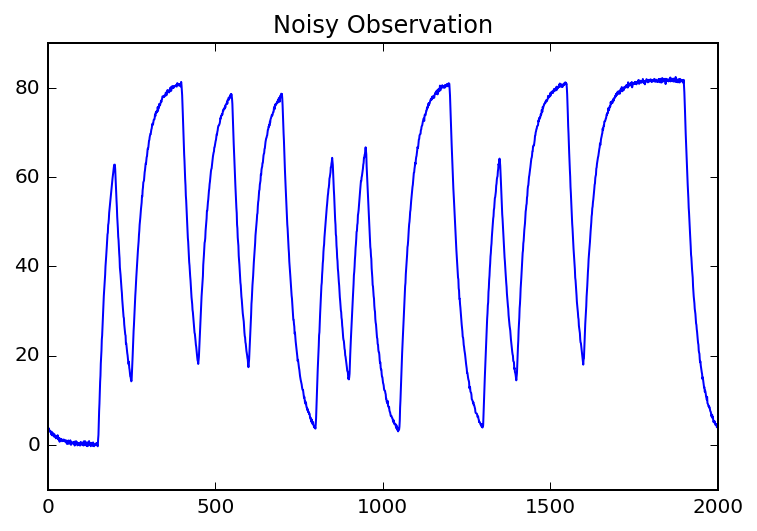

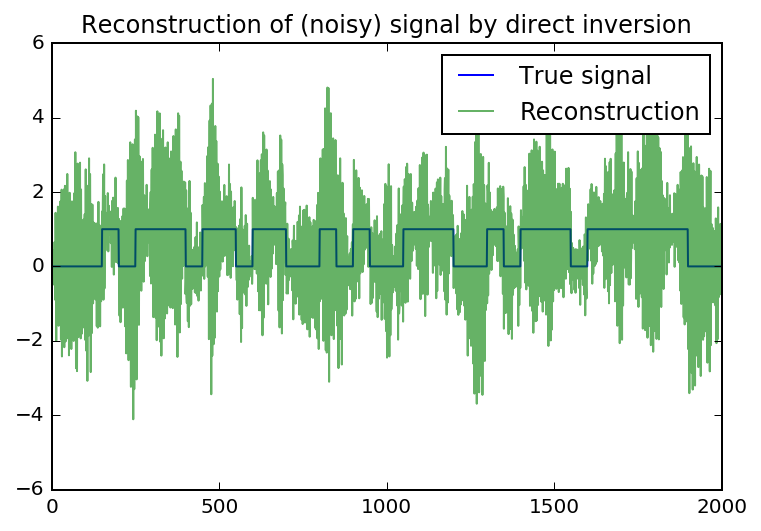

In [14]:
# Noisy observation
z=x+0.25*stats.norm(0,1).rvs((N))
Z=fft(z)
plt.figure()
plt.plot(z)
plt.title("Noisy Observation")
plt.figure()
x_rec=real(ifft(Z/H))
plt.plot(s,label="True signal")
plt.plot(x_rec,alpha=0.6,label="Reconstruction")
plt.title("Reconstruction of (noisy) signal by direct inversion")
plt.legend()

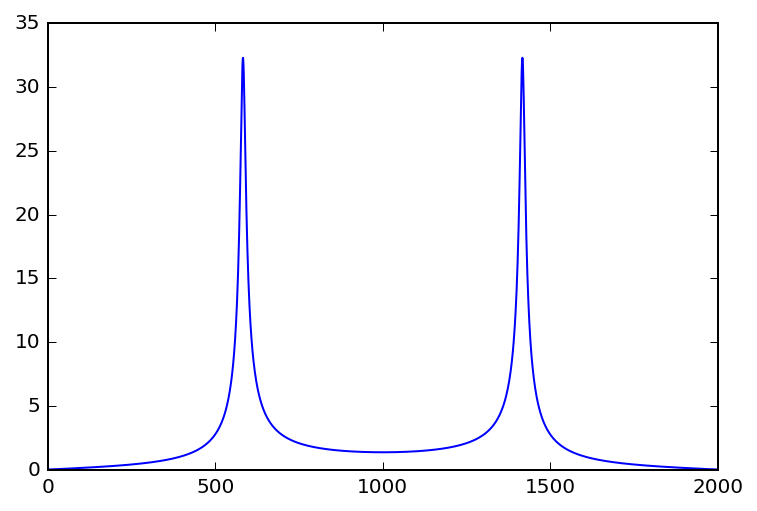

In [15]:
plt.plot(1/abs(H))

#### Derivation of the Wiener filter

Instead of a direct inversion, we put the problem as the design of a filter $w$ which enables to recover an estimate of $s(n)$, from the noisy observation $x(n)$. 
$$
y(n) = [w*x](n)
$$
The objective is to minimize the error $e(n)=y(n)-s(n)$, and more precisely of the mean square error
$$
\E{e(n)^2}.
$$


Recall that 
$$
\E{e(n)^2} = R_{EE}[0] =  \int S_{EE}(f) \dr{f}.
$$
Since $e(n)=y(n)-s(n)$, we have that

\begin{align}
R_{Y-S,Y-S}(k) & =R_{YY}(k)-R_{YS}(k)-R_{SY}(k)+R_{SS}(k) \\
S_{Y-S,Y-S}(f) & =S_{YY}(f)-S_{YS}(f)-S_{SY}(f)+S_{SS}(f) 
\end{align}

From the transformation of the power spectrum by filtering and the symmetries of the cross-spectra, we have
\begin{align}
S_{YY}(f) & = |H(f)W(f)|^2 S_{SS}(f) + |W(f)|^2 S_{VV}(f),\\
S_{YS}(f) & = H(f)W(f) S_{SS}(f), \\
S_{SY}(f) & = S_{YS}(f)^*.
\end{align}
Taking this into account, we arrive at
$$
S_{Y-S,Y-S}(f)  = |H(f)|^2 |W(f)|^2 S_{SS}(f) + |W(f)|^2 S_{VV}(f) + H(f)W(f) S_{SS}(f) + H(f)^*W(f)^* S_{SS}(f) +  S_{SS}(f).
$$
It is easy to check that this formula can be rewritten as
$$
S_{Y-S,Y-S}(f)  = \left( S_{SS}(f)+ S_{VV}(f)\right)\left|W(f)-\frac{H(f)^* S_{SS}(f)}{|H(f)|^2 S_{SS}(f)+ S_{VV}(f)} \right|^2+ S_{SS}(f).
$$
Clearly, it is minimum if 
$$
\boxed{
\displaystyle{
W(f)=\frac{H(f)^* S_{SS}(f)}{|H(f)|^2 S_{SS}(f)+ S_{VV}(f)} 
}}.
$$

From this relation, we learn the following:
- In the noiseless case, that is $S_{VV}(f)=0$, then $W(f)=1/H(f)$. THis is the diert inversion, which is only valid if no noise corrupts the output. 
- for frequencies where the transfer function $H(f)$ is very small, that is where we have a very small signal part,then $W(f)\sim 0$ (no inversion).
- elsewhere, the filter makes a conservative inversion which depends on the local signal-to-noise ratio. 

- In the case $H(f)=1$, the problem reduces to a smoothing problem, that is to  suppress the noise without too much corrupting of the signal part. The Wiener filter reduces to 
\begin{equation}
\boxed{
\displaystyle{
W(f)=\frac{S_{SS}(f)}{ S_{SS}(f)+ S_{VV}(f)} 
}}. \label{eq:wiener_smoother_fdomain}
\end{equation}


In such case, we see that the transfer function tends to 1 if $S_{SS}(f)\gg S_{VV}(f)$ (frequency bands where the signal is significantly higher than the noise), to zero if $S_{SS}(f)\ll S_{VV}(f)$ (much more noise than signal), and otherwise realises a tradeoff guided by the signal-to-noise ratio in the frequency domain.



#### Experiment


We consider an example of optimum filtering, the Wiener smoother. Beginning with a noisy mixture  $x(n)=s(n)+v(n)$, the goal is to find the best filter which minimizes the noise while preserving the signal:  $y(n)=(h*x)(n)\simeq s(n)$. 
 
Simulate a signal $$s(n)=\exp(-a t)\sin(2\pi f_0 t + \phi(\omega)).$$ The corresponding implementation lines are 

```
     A=0.2; N=5000
     t=arange(N)
     s=exp(-0.001*t)*sin(2*pi*0.001*t+2*pi*rand(1))
     w=A*randn(N)
     x=s+w
 ```
 
It can be shown that the optimum Wiener filter is such that 
 $$
 H(f)=\frac{S_{ss}(f)}{S_{SS}(f)+S_{VV}(f)},$$ 
 where $S_{SS}(f)$ and $S_{VV}(f)$ are respectively the power spectra of the signal and of the noise.
 Implement this filter and compute its output. 
 In practice, what must be known in order to implement this filter? Is this reasonable? Look at the impulse response and comment. What are the other difficulties for implementation?

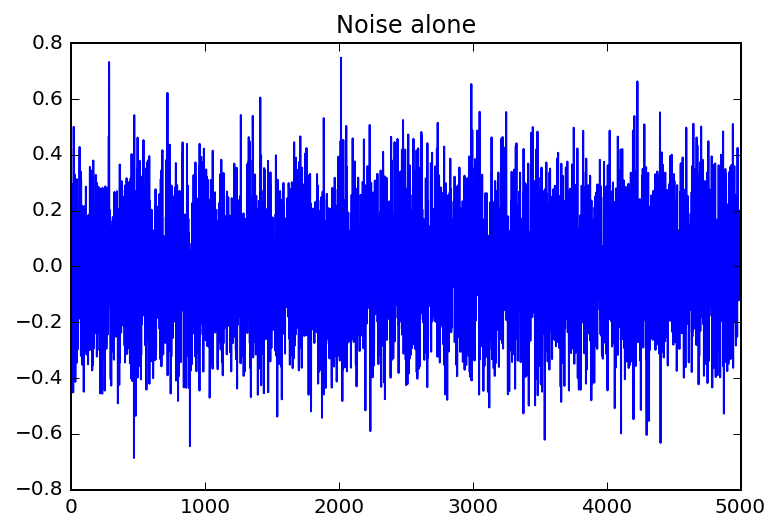

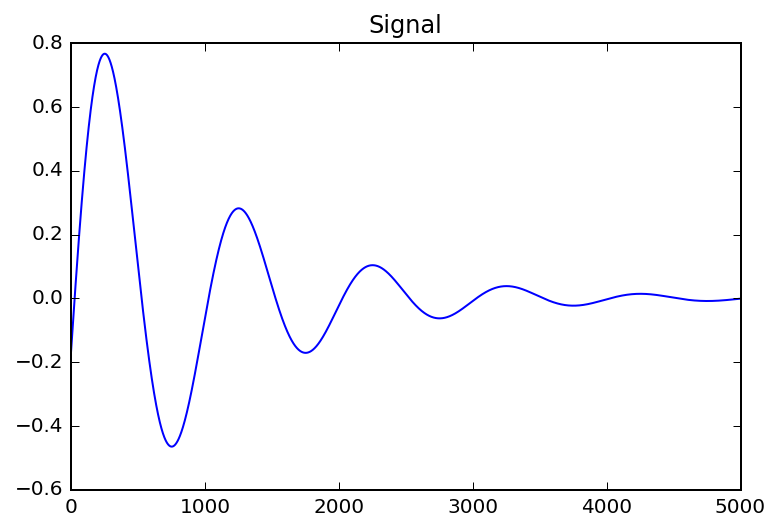

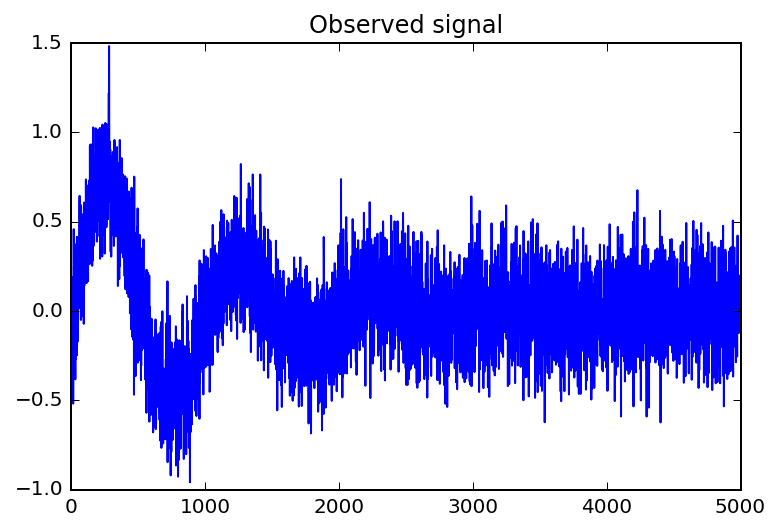

In [16]:
A=0.2
N=5000
t=arange(N)
s=exp(-0.001*t)*sin(2*pi*0.001*t+2*pi*rand(1))
w=A*randn(N)
figure(1); plot(w); title('Noise alone')
x=s+w
figure(2); plot(s); title('Signal')
figure(3); plot(x); title('Observed signal')

Implementation

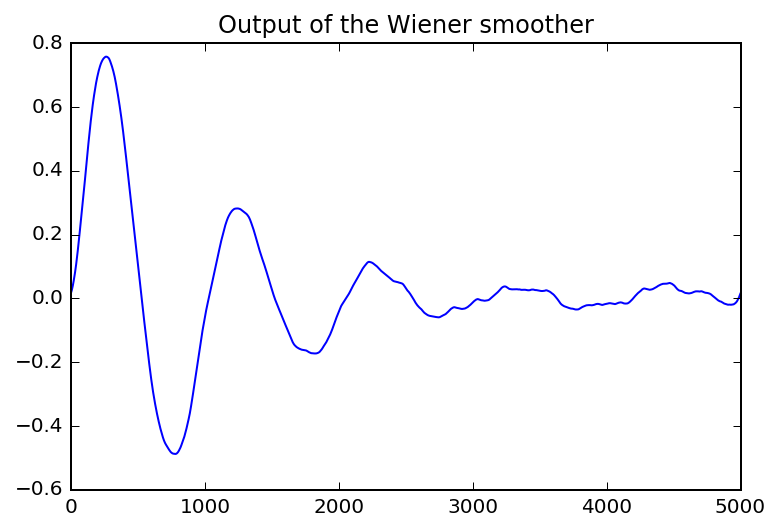

In [17]:
Sss=1/N*abs(fft(s))**2
Svv=A*A*ones(N)
H=Sss/(Sss+Svv)
xx=real(ifft(H*fft(x)))

plot(xx)
title('Output of the Wiener smoother')

 The drawbacks are that
 
 - One must know the spectra of the signal and of the noise. Here we have suppposed that the noise is white and that we knew its variance. Furthermore, we assumed that the spectrum of the signal is known.
 - The impulse response may have an infinite support and is not causal. For implementation in real time, on should select a causal solution. This requires to perform a spectral factorization and this is another story, see [here](http://webee.technion.ac.il/people/shimkin/Estimation09/ch3_Wiener.pdf) or [here, page 208](http://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-011-introduction-to-communication-control-and-signal-processing-spring-2010/readings/MIT6_011S10_chap11.pdf) for details. 

#### Wiener Smoother in the time domain

We now look for the expression of an optimal smoother in the time domain. Of course, we could simply take the impulse response associated with the frequency response (\ref{eq:wiener_smoother_fdomain}). However, as we saw above, this impulse response is non-causal and has infinite duration. Instead, we shall reformulate the problem to include the fact that we look for a causal finite impulse response. We begin with the observation equation
$$
x(n)= s(n) + v(n).
$$
and we look for the filter with impulse response $w(n)$ such that $y(n)=[w*x](n)$ is as near as possible of $s(n)$: this can be formulated as the search for $w$ which minimizes the mean square error
$$
\E{\left([w*x](n)-s(n)\right)^2}.
$$
For a FIR filter, the convolution cans be written as the scalar product
$\def\wb{\mathbf{w}} \def\sb{\mathbf{s}} \def\xb{\mathbf{x}}$
$\def\Rb{\mathbf{R}} \def\rb{\mathbf{r}} $
$$
y(n) = [w*x](n) = \sum_{m=0}^{p-1} w(m) x(n-m) = \wb^t\xb(n)
$$
where $\wb^t=[w(0, w(1)\ldots w(p-1)]$ and $\xb(n)^t=[x(n), x(n-1), \ldots x(n-p+1)]$. The mean square error can then be written as the function of $\wb$
$$
J(\wb)=\E{\left(\wb^t\xb(n)-s(n)\right)^2}.
$$
By the chain rule for differentiation and the fact that 
$$
\frac{\dr \wb^t\xb(n)}{\dr \wb} = \xb(n),
$$
we get that
\begin{align}
\frac{\dr J(\wb)}{\dr \wb} & = 2 \E{\xb(n) \left(\wb^t\xb(n)-s(n)\right)}\\
& = 2 \E{\xb(n) \left(\xb^t\wb(n)-s(n)\right)}, \\
& = 2 \E{\xb(n)\xb(n)^t }\wb - \E{\xb(n) s(n)}. \\
\end{align}
The first term involves a correlation matrix of $\xb(n)$ and the second the vector of cross correlations between $\xb(n)$ and $s(n)$. Denoting
$$
\begin{cases}
\Rb_{XX}=\E{\xb(n)\xb(n)^t },\\
\rb_{SX}=\E{\xb(n) s(n)}
\end{cases}
$$
we obtain
$$
\Rb_{XX} \wb = \rb_{SX}
$$
or 
$$
\boxed{
\displaystyle{
\wb = \Rb_{XX}^{-1} \rb_{SX}
}}
$$
if  $\Rb_{XX}$ is invertible. 


----
<div align=right> <a href=toc.ipynb>Index</a> - <a href=Lecture2_RandomSignals.ipynb>Back</a> - <a href=Optimum_filtering.ipynb>Next</a></div>